In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
#####################kagle reivew ######################
import pandas as pd 
df = pd.read_csv('./problem1.csv')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17910 entries, 0 to 17909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17910 non-null  object 
 1   Temperature    17910 non-null  float64
 2   Humidity       17910 non-null  float64
 3   Light          17910 non-null  float64
 4   CO2            17889 non-null  float64
 5   HumidityRatio  17910 non-null  float64
 6   Occupancy      17910 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 979.6+ KB


In [6]:
# 온도,습도,조도,co2농도에 따른 객실의 사용유무 판별
# 종속변수 occupancy:0(비어있음),1:(사용중)  

display(df.isnull().sum())
print()
# 결측치 co2 컬럼 exist check

print(df[df.CO2.isnull()].date.values)
# CO2 열에 결측치가 있는 행의 date 열 값을 출력

date              0
Temperature       0
Humidity          0
Light             0
CO2              21
HumidityRatio     0
Occupancy         0
dtype: int64


['2015-02-03 19:09:59' '2015-02-03 19:31:00' '2015-02-04 18:08:00'
 '2015-02-05 06:08:00' '2015-02-05 16:09:59' '2015-02-08 08:06:00'
 '2015-02-08 11:54:00' '2015-02-08 20:58:59' '2015-02-09 06:04:59'
 '2015-02-09 07:31:00' '2015-02-09 07:49:00' '2015-02-10 07:53:59'
 '2015-02-12 00:34:00' '2015-02-12 10:53:00' '2015-02-12 15:04:00'
 '2015-02-12 20:38:00' '2015-02-13 22:53:59' '2015-02-15 16:41:59'
 '2015-02-16 00:53:59' '2015-02-17 01:56:00' '2015-02-18 06:20:00']


e:\Anaconda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

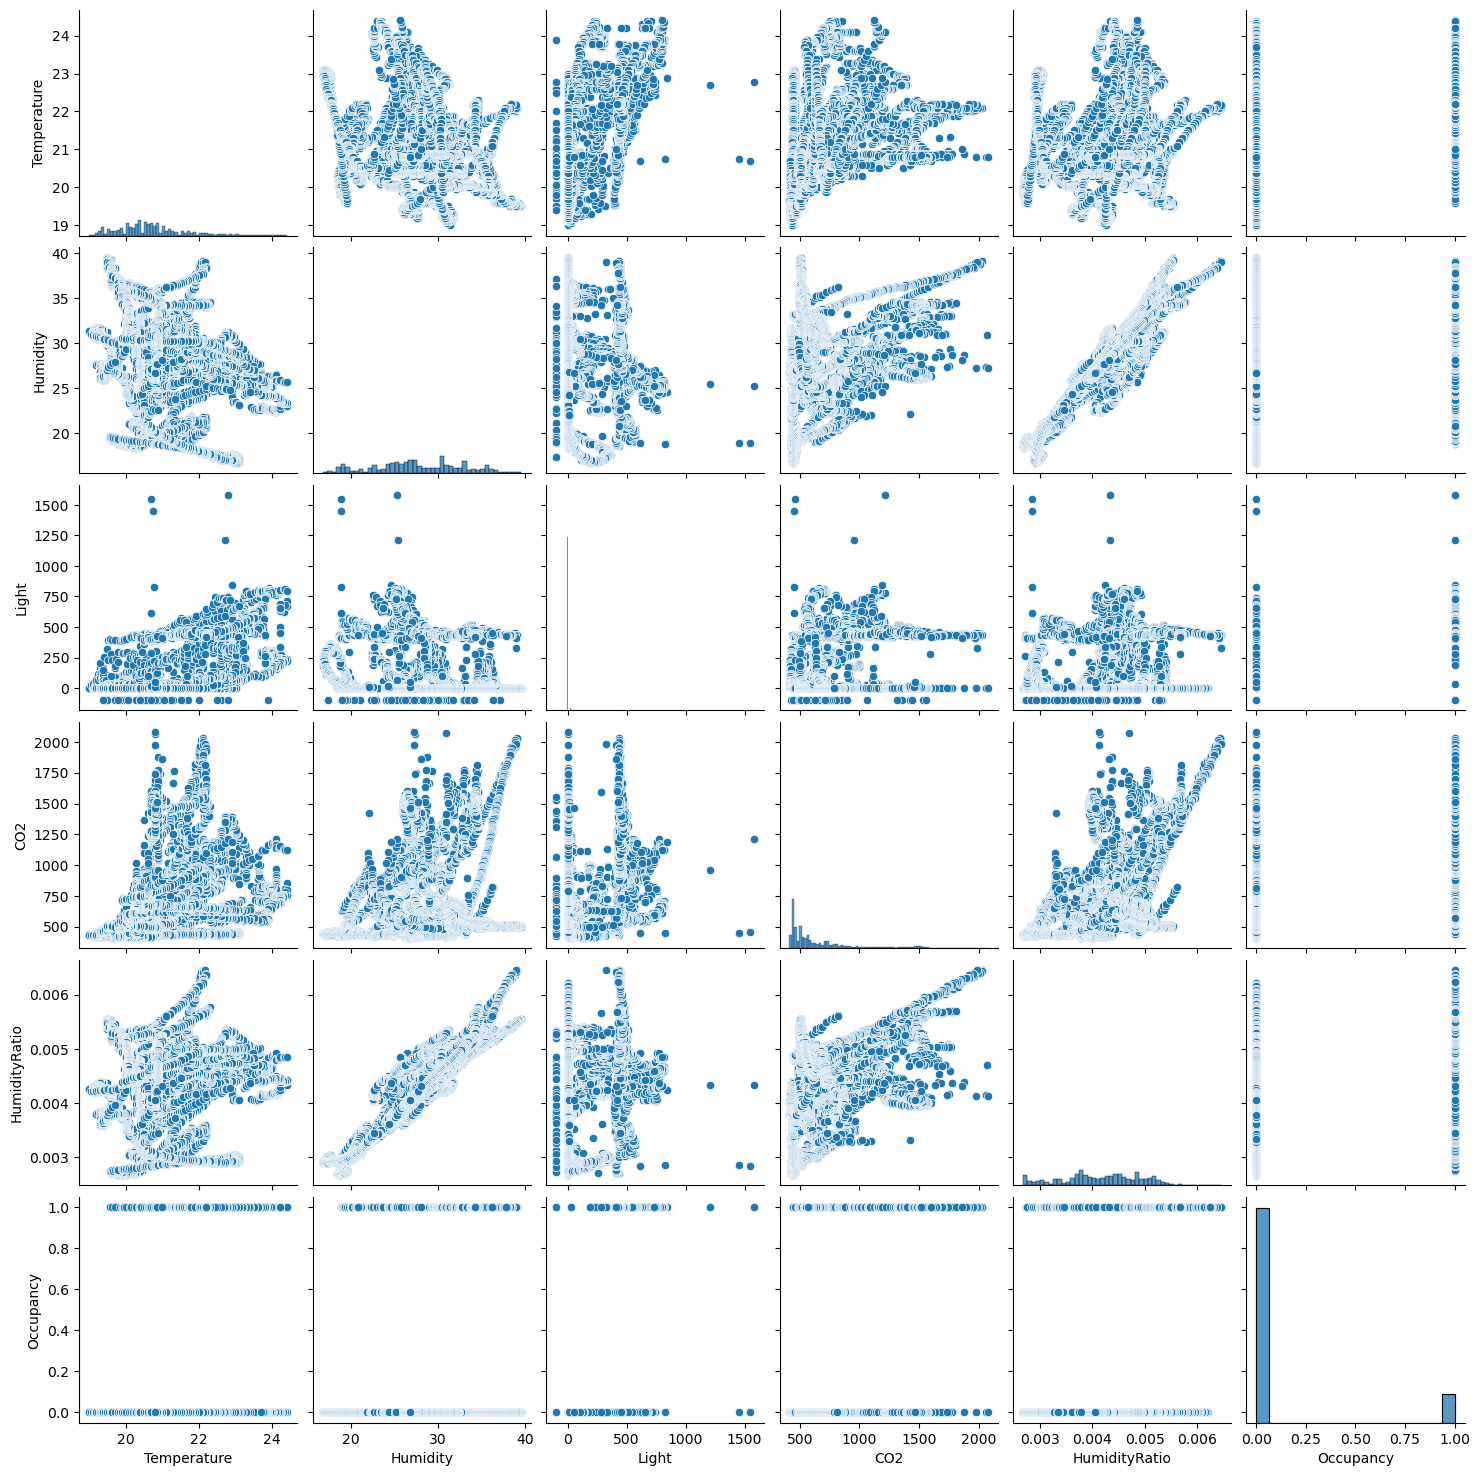

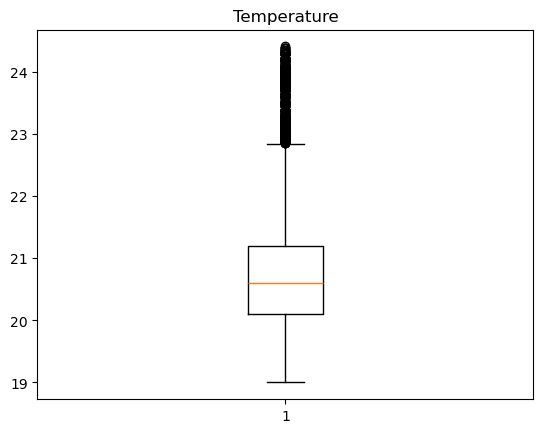

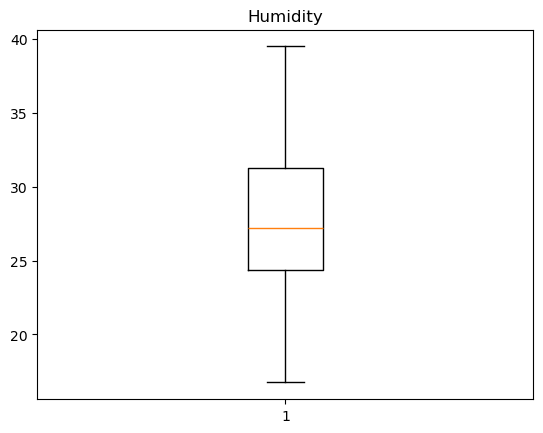

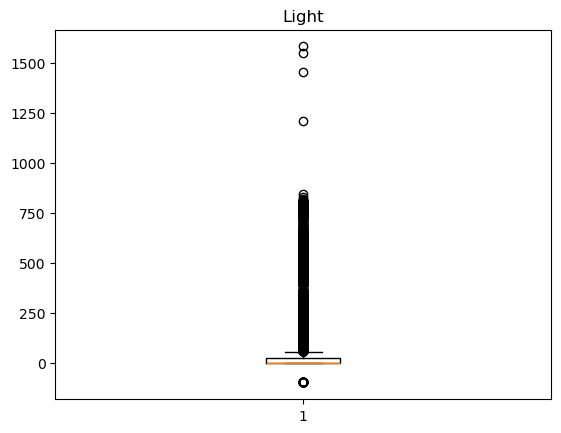

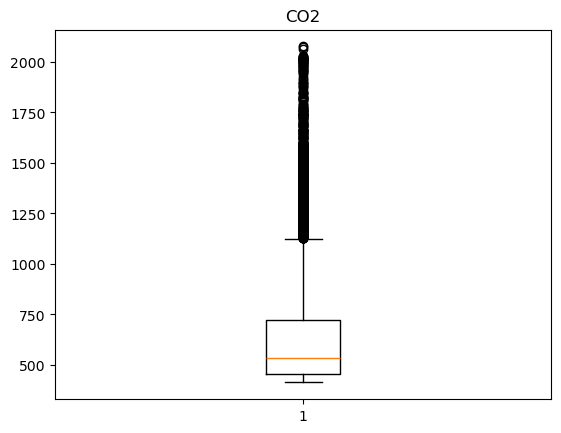

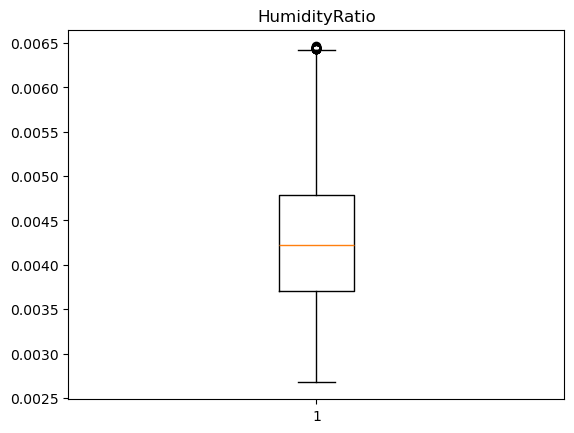

In [7]:
# 상관관계 분석 
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()
for  v in df.select_dtypes(include='float'):
    target = df[v].dropna() 
    plt.boxplot(target)
    plt.title(v)
    plt.show()

# Humidity, HumidityRatio 높은 상관관계
# 2개 뺴고 높은 이상치 

In [8]:
display(df[df.Light < 0].shape)
display(df.describe())
# Light data :-99 check(df.Light<0) 

(50, 7)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,17910.000000,17910.000000,17910.000000,17889.000000,17910.000000,17910.000000
mean,20.749036,27.589163,78.157369,647.700865,0.004175,0.117253
std,0.994012,5.043595,168.574068,285.997340,0.000755,0.321730
min,19.000000,16.745000,-99.000000,412.750000,0.002674,0.000000
25%,20.100000,24.390000,0.000000,453.000000,0.003702,0.000000
50%,20.600000,27.200000,0.000000,532.666667,0.004222,0.000000
75%,21.200000,31.290000,22.000000,722.000000,0.004790,0.000000
max,24.408333,39.500000,1581.000000,2076.500000,0.006461,1.000000


In [9]:
df['date'] = pd.to_datetime(df['date']) 
timedeltas = df['date'].diff().dt.seconds.dropna() 
display(timedeltas.describe())
print() 
# 75%의 데이터가 61초 이내의 시간차이를 둔다.
# 연속된 데이터간의 최대 시간차이는 25680초로 대략 7시간 차이가 존재한다

count    17909.000000
mean        71.357474
std        241.363584
min         59.000000
25%         60.000000
50%         60.000000
75%         61.000000
max      25680.000000
Name: date, dtype: float64

In [10]:
for value in df[df.CO2.isnull()].index:
    target = df.iloc[value-1:value+2]
    difftime = target['date'].diff().dt.seconds.dropna()
    if target.Occupancy.nunique() ==1 and len(difftime[difftime>180]) ==0:
        df.loc[value,'CO2'] =df.loc[value-1].CO2

In [11]:
df.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [12]:
df.loc[df.Light ==-99,'Light'] = 0


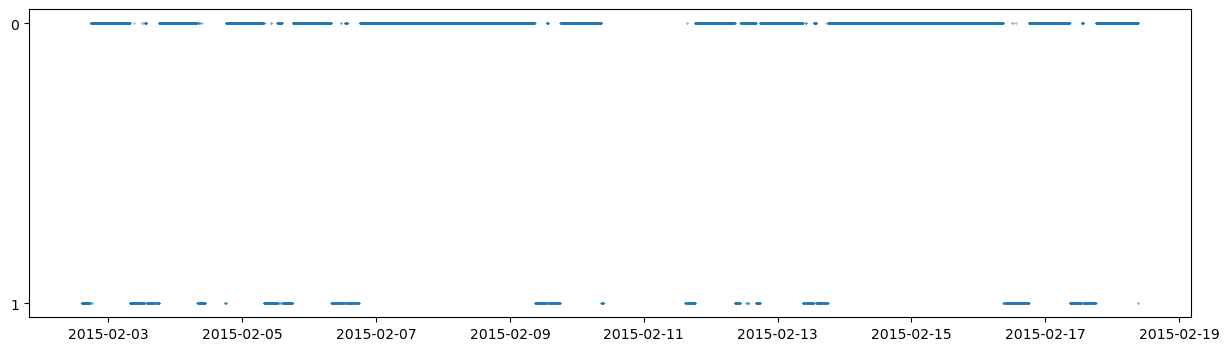

Occupancy
0    15810
1     2100
Name: count, dtype: int64

In [13]:
plt.figure(figsize=(15,4))
plt.scatter(df['date'],df['Occupancy'].astype('str'),s=0.03)
plt.show() 
df.Occupancy.value_counts() 
# 비어있지 않은 경우 보다 비어있는 경우가 더 많기에 불균형이 존재 

In [20]:
df = pd.read_csv('./problem2.csv') 
print('검증에 불필요한 데이터:',df[df['life span']==10000].shape[0]) 


df_fillter = df[df['life span'] != 10000]

검증에 불필요한 데이터: 4
